In [1]:
import dnnlib
import legacy
import torch
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import scipy.interpolate
import math
import random
import preprocessing.image_utils as itools
import cv2
import synthesis.synthesis as synth
from tqdm import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
network_pkl = "../t-golden-fid14.19.pkl"
device = torch.device('cuda')
G = synth.load_generator(network_pkl, device)

Loading networks from "../t-golden-fid14.19.pkl"...
Network loaded.


Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
torch.Size([1, 3, 1024, 1024])


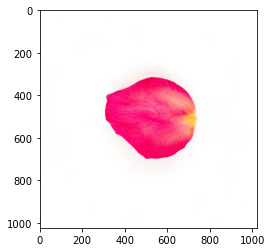

In [4]:
img = synth.synthesize_rand_image(50, G, device)
plt.imshow(img)

In [8]:
kimgs = synth.synthesize_rand_interp([9, 300, 32], G, device, w_frames=4)

interpolating:  [9, 300, 32]
ws.shape original torch.Size([3, 16, 512])
ws[:1].shape torch.Size([3])
ws.shape torch.Size([1, 1, 3, 16, 512])
x.shape, y.shape (9,) (9, 16, 512)


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.69it/s]


out.shape (6969, 6969, 3) uint8


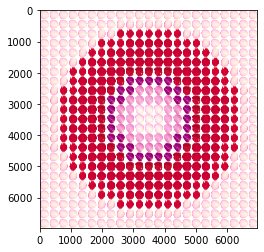

In [9]:
k = synth.create_kaleidoscope(kimgs)
plt.imshow(k)